### train, test 와 교차검증

In [3]:
# 필요한 패키지 설치 및 로드
# install.packages("caret")
library(caret)

# 데이터셋 로드
data(iris)

# 랜덤 시드 설정
set.seed(123)

# 데이터셋 80%를 train 데이터로 분할
trainIndex <- createDataPartition(iris$Species, p = 0.8, list = FALSE)
trainData <- iris[trainIndex, ]
testData <- iris[-trainIndex, ]

# 결과 확인
dim(trainData)  # Train 데이터의 크기
dim(testData)   # Test 데이터의 크기

# 로지스틱 회귀 모델을 위한 교차 검증 설정
train_control <- trainControl(method = "cv", number = 10)


# 로지스틱 회귀 모델 훈련
# glm (generalized linear model)을 method로 설정하면 로지스틱 회귀가 수행됩니다.
# model <- train(Species ~ ., data = trainData, method = "glm", family = "binomial", trControl = train_control)

# 로지스틱 회귀 모델 훈련
# Species는 범주형 변수이므로 로지스틱 회귀를 사용할 수 있습니다.
# glm (generalized linear model)을 method로 설정하면 로지스틱 회귀가 수행됩니다.
# 다항 로지스틱 회귀 모델을 위한 교차 검증 설정
train_control <- trainControl(method = "cv", number = 10)

# 다항 로지스틱 회귀 모델 훈련
# nnet 패키지의 multinom() 함수 사용
model <- train(Species ~ ., data = trainData, method = "multinom", trControl = train_control)

# 모델 결과 확인
print(model)



[1] 120   5

[1] 30  5

# weights:  18 (10 variable)
initial  value 118.650127 
iter  10 value 12.883613
iter  20 value 4.029465
iter  30 value 3.450826
iter  40 value 3.045522
iter  50 value 2.751927
iter  60 value 2.648693
iter  70 value 2.604257
iter  80 value 2.516619
iter  90 value 2.289424
iter 100 value 2.231053
final  value 2.231053 
stopped after 100 iterations
# weights:  18 (10 variable)
initial  value 118.650127 
iter  10 value 23.328318
iter  20 value 21.230695
iter  30 value 21.224297
final  value 21.224295 
converged
# weights:  18 (10 variable)
initial  value 118.650127 
iter  10 value 12.904503
iter  20 value 4.183928
iter  30 value 3.705874
iter  40 value 3.379875
iter  50 value 3.294117
iter  60 value 3.248696
iter  70 value 3.203788
iter  80 value 3.168595
iter  90 value 3.139727
iter 100 value 3.129583
final  value 3.129583 
stopped after 100 iterations
# weights:  18 (10 variable)
initial  value 118.650127 
iter  10 value 12.114332
iter  20 value 4.085976
iter  30 value 3.489223
iter  40

initial  value 118.650127 
iter  10 value 11.802458
iter  20 value 3.727257
iter  30 value 3.329494
iter  40 value 3.151717
iter  50 value 3.090914
iter  60 value 3.037558
iter  70 value 2.991846
iter  80 value 2.959355
iter  90 value 2.933462
iter 100 value 2.927072
final  value 2.927072 
stopped after 100 iterations
# weights:  18 (10 variable)
initial  value 131.833475 
iter  10 value 24.084890
iter  20 value 21.912059
iter  30 value 21.900932
final  value 21.900928 
converged
Penalized Multinomial Regression 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results across tuning parameters:

  decay  Accuracy   Kappa 
  0e+00  0.9666667  0.9500
  1e-04  0.9750000  0.9625
  1e-01  0.9833333  0.9750

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was decay = 0.1.


### 오버샘플링

In [4]:
# 필요한 패키지 설치 및 로드
install.packages("mlbench")
library(mlbench)

# 데이터셋 로드
data(PimaIndiansDiabetes)

# 클래스 분포 확인 (diabetes 여부)
table(PimaIndiansDiabetes$diabetes)


Installing package into 'C:/Users/medici/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'mlbench' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\medici\AppData\Local\Temp\RtmpoPu30K\downloaded_packages



neg pos 
500 268 

In [5]:
# 필요한 패키지 설치
install.packages("ROSE")
library(ROSE)

# 오버 샘플링 적용
set.seed(123)  # 재현 가능성을 위한 시드 설정
oversampled_data <- ROSE(diabetes ~ ., data = PimaIndiansDiabetes, seed = 123, N = 1000)$data

# 오버 샘플링 후 클래스 분포 확인
table(oversampled_data$diabetes)


Installing package into 'C:/Users/medici/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'ROSE' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\medici\AppData\Local\Temp\RtmpoPu30K\downloaded_packages


Loaded ROSE 0.0-4





neg pos 
507 493 

설명:
ROSE(diabetes ~ ., data = PimaIndiansDiabetes, seed = 123, N = 1000)은 PimaIndiansDiabetes 데이터셋에서 오버샘플링을 적용하여 클래스 불균형을 해결합니다. 여기서 N = 1000은 샘플링할 데이터의 수를 의미합니다.
오버샘플링 후 클래스 분포를 table() 함수로 확인할 수 있습니다.

### 1.로지스틱 회귀분석

In [8]:
# 필요한 패키지 설치 및 로드
install.packages("caret")
library(caret)

# 데이터셋 로드
data(iris)

# 두 개의 클래스만 선택 (setosa, versicolor)
iris_binary <- subset(iris, Species %in% c("setosa", "versicolor"))

# 클래스 이름을 숫자로 변환 (로지스틱 회귀는 이진 분류기에 적합)
iris_binary$Species <- factor(iris_binary$Species, levels = c("setosa", "versicolor"))

# 데이터 확인
table(iris_binary$Species)


# 로지스틱 회귀 모델 생성
logistic_model <- glm(Species ~ ., data = iris_binary, family = binomial)

# 모델 요약
summary(logistic_model)


# 예측 수행
predicted_prob <- predict(logistic_model, iris_binary, type = "response")

# 예측된 확률을 기반으로 클래스 예측 (0.5를 기준으로 setosa 또는 versicolor로 분류)
predicted_class <- ifelse(predicted_prob > 0.5, "versicolor", "setosa")

# 실제값과 예측값 비교
confusionMatrix(factor(predicted_class, levels = c("setosa", "versicolor")), iris_binary$Species)



Warning message:
"package 'caret' is in use and will not be installed"



    setosa versicolor 
        50         50 

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Species ~ ., family = binomial, data = iris_binary)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)
(Intercept)       6.556 601950.324       0        1
Sepal.Length     -9.879 194223.245       0        1
Sepal.Width      -7.418  92924.451       0        1
Petal.Length     19.054 144515.981       0        1
Petal.Width      25.033 216058.936       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.3863e+02  on 99  degrees of freedom
Residual deviance: 1.3166e-09  on 95  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor
  setosa         50          0
  versicolor      0         50
                                     
               Accuracy : 1          
                 95% CI : (0.9638, 1)
    No Information Rate : 0.5        
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0        
            Specificity : 1.0        
         Pos Pred Value : 1.0        
         Neg Pred Value : 1.0        
             Prevalence : 0.5        
         Detection Rate : 0.5        
   Detection Prevalence : 0.5        
      Balanced Accuracy : 1.0        
                                     
       'Positive' Class : setosa     
                                     

### 2. 의사결정 나무

In [9]:
# 필요한 패키지 설치 및 로드
install.packages("rpart")
install.packages("rpart.plot")  # 시각화를 위한 패키지
library(rpart)
library(rpart.plot)

# 데이터셋 로드
data(iris)


Installing package into 'C:/Users/medici/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\medici\AppData\Local\Temp\RtmpoPu30K\downloaded_packages


Installing package into 'C:/Users/medici/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\medici\AppData\Local\Temp\RtmpoPu30K\downloaded_packages


In [10]:
# 의사결정나무 모델 생성
# Species(종) 변수를 예측하는 모델 생성
tree_model <- rpart(Species ~ ., data = iris, method = "class")

# 모델 요약 출력
print(tree_model)


n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *


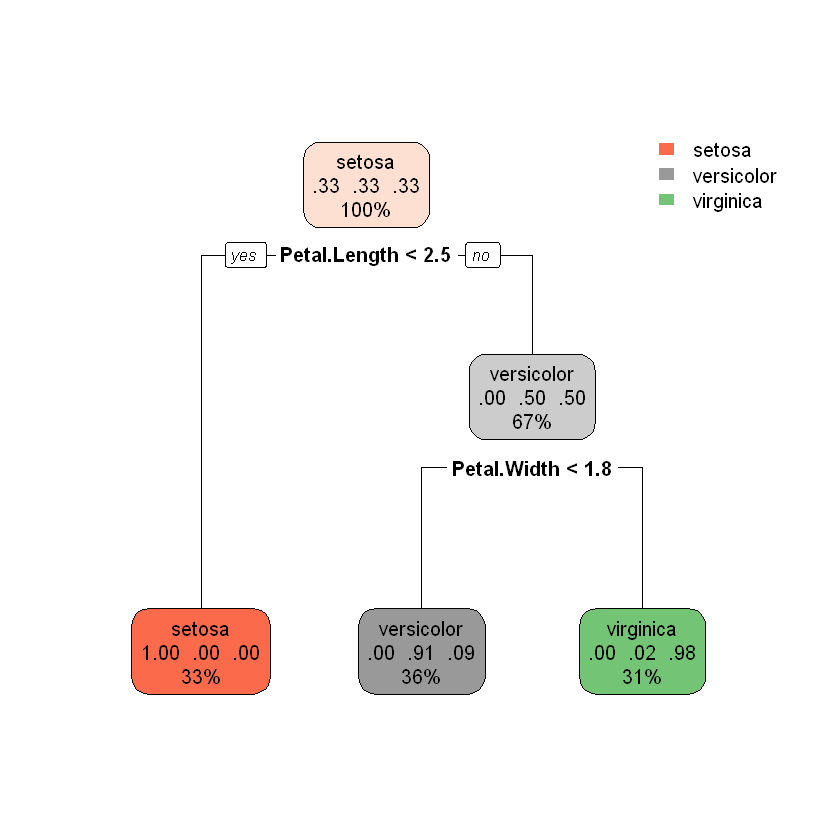

In [11]:
# 의사결정나무 시각화
rpart.plot(tree_model)


In [12]:
# 모델을 사용하여 예측 수행
predicted_class <- predict(tree_model, iris, type = "class")

# 실제값과 예측값 비교
confusionMatrix(predicted_class, iris$Species)


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         49         5
  virginica       0          1        45

Overall Statistics
                                         
               Accuracy : 0.96           
                 95% CI : (0.915, 0.9852)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.94           
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9800           0.9000
Specificity                 1.0000            0.9500           0.9900
Pos Pred Value              1.0000            0.9074           0.9783
Neg Pred Value              1.0000            0.9896           0.9519
Prevalence

설명:
rpart(Species ~ ., data = iris, method = "class")는 Species를 예측하기 위한 의사결정나무 모델을 생성합니다.
rpart.plot() 함수는 의사결정나무를 시각화하여 노드와 분기 구조를 한눈에 볼 수 있게 도와줍니다.
predict() 함수로 새로운 데이터를 예측하고, confusionMatrix()로 실제값과 예측값을 비교하여 모델의 성능을 평가할 수 있습니다.

#### 배깅

In [13]:
# 필요한 패키지 설치 및 로드
install.packages("randomForest")
library(randomForest)

# 데이터셋 로드
data(iris)

# 랜덤 포레스트 모델 생성 (배깅 기반)
set.seed(123)  # 재현 가능성을 위한 시드 설정
rf_model <- randomForest(Species ~ ., data = iris, ntree = 100)

# 모델 요약
print(rf_model)

# 모델 예측 및 성능 평가
predicted_class <- predict(rf_model, iris)
table(predicted_class, iris$Species)


Installing package into 'C:/Users/medici/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\medici\AppData\Local\Temp\RtmpoPu30K\downloaded_packages


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin





Call:
 randomForest(formula = Species ~ ., data = iris, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.67%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          4        46        0.08


               
predicted_class setosa versicolor virginica
     setosa         50          0         0
     versicolor      0         50         0
     virginica       0          0        50

### 부스팅

Installing package into 'C:/Users/medici/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'gbm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\medici\AppData\Local\Temp\RtmpoPu30K\downloaded_packages


Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3

Warning message:
"Setting `distribution = "multinomial"` is ill-advised as it is currently broken. It exists only for backwards compatibility. Use at your own risk."


var          rel.inf  
Petal.Length Petal.Length 62.730741
Petal.Width  Petal.Width  28.819659
Sepal.Width  Sepal.Width   6.069913
Sepal.Length Sepal.Length  2.379687

               
predicted_class  0  1  2
              1 50  0  0
              2  0 50  0
              3  0  0 50

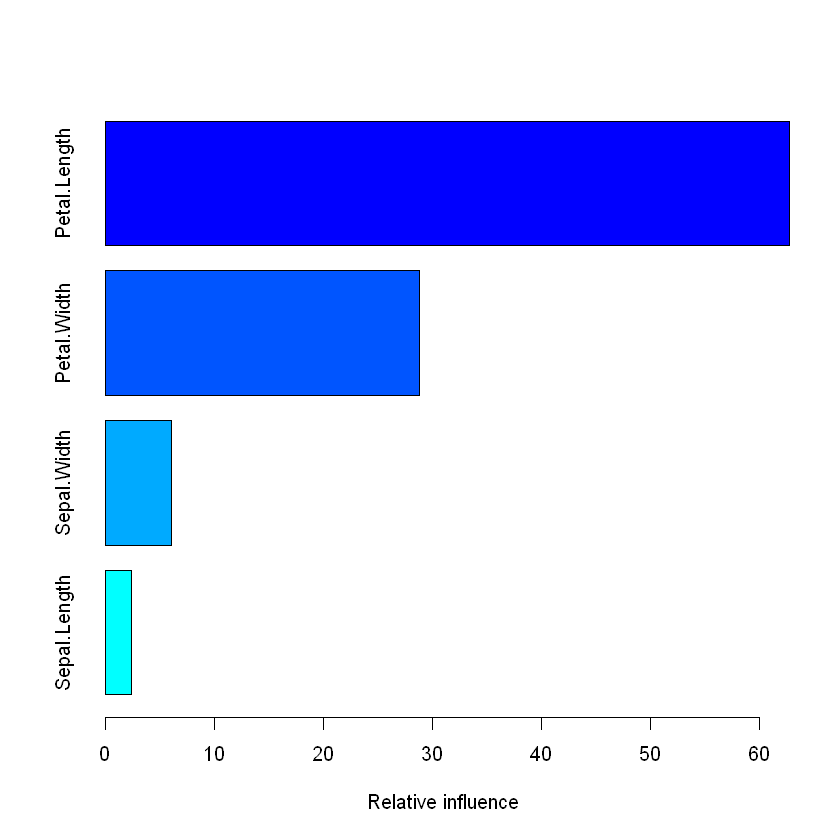

In [14]:
# 필요한 패키지 설치 및 로드
install.packages("gbm")
library(gbm)

# 데이터셋 로드
data(iris)

# 데이터셋에서 Species는 범주형 변수를 숫자로 변환 (필수)
iris$Species <- as.numeric(iris$Species) - 1

# Gradient Boosting 모델 생성
set.seed(123)  # 재현 가능성을 위한 시드 설정
gbm_model <- gbm(Species ~ ., data = iris, distribution = "multinomial", n.trees = 100, interaction.depth = 3)

# 모델 요약
summary(gbm_model)

# 예측 수행 (100번째 트리를 사용하여 예측)
predicted_class <- predict(gbm_model, iris, n.trees = 100, type = "response")
predicted_class <- apply(predicted_class, 1, which.max)  # 가장 높은 확률을 가진 클래스를 선택

# 실제값과 예측값 비교
table(predicted_class, iris$Species)


### 랜덤포리스트

In [15]:
# 필요한 패키지 설치 및 로드
install.packages("randomForest")
library(randomForest)

# 데이터셋 로드
data(iris)

# 데이터 확인
head(iris)


Warning message:
"package 'randomForest' is in use and will not be installed"


Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

In [16]:
# 랜덤 포레스트 모델 생성
set.seed(123)  # 재현 가능성을 위한 시드 설정
rf_model <- randomForest(Species ~ ., data = iris, ntree = 100)

# 모델 요약
print(rf_model)



Call:
 randomForest(formula = Species ~ ., data = iris, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.67%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          4        46        0.08


### 인공신경망

In [18]:
# 필요한 패키지 설치 및 로드
install.packages("nnet")
library(nnet)

# 데이터셋 로드
data(iris)

# 데이터 확인
head(iris)

# 종속변수(Species)를 숫자로 변환 (신경망 모델에서 범주형 데이터를 처리하기 위해 필요)
iris$Species <- as.numeric(iris$Species) - 1  # 0, 1, 2로 변환

# 인공신경망 모델 생성
set.seed(123)  # 재현 가능성을 위한 시드 설정
nn_model <- nnet(Species ~ ., data = iris, size = 5, rang = 0.1, decay = 5e-4, maxit = 200)

# 모델 요약
summary(nn_model)



Warning message:
"package 'nnet' is in use and will not be installed"


Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

# weights:  31
initial  value 134.497825 
iter  10 value 100.083148
iter  20 value 57.311988
iter  30 value 51.333497
iter  40 value 50.210082
iter  50 value 50.160476
iter  60 value 50.131865
iter  70 value 50.092960
iter  80 value 50.087743
iter  90 value 50.078881
iter 100 value 50.072688
iter 110 value 50.063063
iter 120 value 50.056866
iter 130 value 50.051204
iter 140 value 50.046794
iter 150 value 50.044825
iter 160 value 50.043334
iter 170 value 50.042636
final  value 50.042560 
converged


a 4-5-1 network with 31 weights
options were - decay=5e-04
 b->h1 i1->h1 i2->h1 i3->h1 i4->h1 
 -0.23  -0.41  -0.85   1.40   0.74 
 b->h2 i1->h2 i2->h2 i3->h2 i4->h2 
 -0.22  -0.41  -0.84   1.38   0.74 
 b->h3 i1->h3 i2->h3 i3->h3 i4->h3 
  0.22   0.41   0.84  -1.37  -0.73 
 b->h4 i1->h4 i2->h4 i3->h4 i4->h4 
  0.21   0.38   0.79  -1.30  -0.68 
 b->h5 i1->h5 i2->h5 i3->h5 i4->h5 
 -0.23  -0.42  -0.86   1.42   0.75 
 b->o h1->o h2->o h3->o h4->o h5->o 
 0.29  3.47  3.49 -3.48 -2.97  3.47 

In [20]:
# 필요한 패키지 설치 및 로드
install.packages("neuralnet")
library(neuralnet)

# 데이터셋 로드
data(iris)

# 데이터 확인
head(iris)

# 범주형 변수를 숫자로 변환 (One-hot encoding)
iris$setosa <- ifelse(iris$Species == "setosa", 1, 0)
iris$versicolor <- ifelse(iris$Species == "versicolor", 1, 0)
iris$virginica <- ifelse(iris$Species == "virginica", 1, 0)

# Species 컬럼 제거하고 one-hot encoding된 컬럼 사용
iris <- iris[, -5]


# 인공신경망 모델 생성
set.seed(123)  # 재현 가능성을 위한 시드 설정
nn_model <- neuralnet(setosa + versicolor + virginica ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width,
                      data = iris, hidden = 5, linear.output = FALSE)

# 모델 요약
print(nn_model)

# 모델 시각화
plot(nn_model)


Warning message:
"package 'neuralnet' is in use and will not be installed"


Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

$call
neuralnet(formula = setosa + versicolor + virginica ~ Sepal.Length + 
    Sepal.Width + Petal.Length + Petal.Width, data = iris, hidden = 5, 
    linear.output = FALSE)

$response
    setosa versicolor virginica
1        1          0         0
2        1          0         0
3        1          0         0
4        1          0         0
5        1          0         0
6        1          0         0
7        1          0         0
8        1          0         0
9        1          0         0
10       1          0         0
11       1          0         0
12       1          0         0
13       1          0         0
14       1          0         0
15       1          0         0
16       1          0         0
17       1          0         0
18       1          0         0
19       1          0         0
20       1          0         0
21       1          0         0
22       1          0         0
23       1          0         0
24       1          0         0
25       1    

### 나브베이즈

In [21]:
# 필요한 패키지 설치 및 로드
install.packages("e1071")
library(e1071)

# 데이터셋 로드
data(iris)

# 데이터 확인
head(iris)


Installing package into 'C:/Users/medici/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'e1071' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'e1071'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\medici\AppData\Local\R\win-library\4.4\00LOCK\e1071\libs\x64\e1071.dll to C:\Users\medici\AppData\Local\R\win-library\4.4\e1071\libs\x64\e1071.dll: Permission denied"
Warning message:
"restored 'e1071'"



The downloaded binary packages are in
	C:\Users\medici\AppData\Local\Temp\RtmpoPu30K\downloaded_packages


Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

In [23]:
# 나이브 베이즈 모델 생성
nb_model <- naiveBayes(Species ~ ., data = iris)

# 모델 요약
print(nb_model)


# 예측 수행
predicted_class <- predict(nb_model, iris)

# 실제값과 예측값 비교
confusion_matrix <- table(predicted_class, iris$Species)
print(confusion_matrix)

# 정확도 계산
accuracy <- mean(predicted_class == iris$Species)
print(paste("정확도:", accuracy))



Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Conditional probabilities:
            Sepal.Length
Y             [,1]      [,2]
  setosa     5.006 0.3524897
  versicolor 5.936 0.5161711
  virginica  6.588 0.6358796

            Sepal.Width
Y             [,1]      [,2]
  setosa     3.428 0.3790644
  versicolor 2.770 0.3137983
  virginica  2.974 0.3224966

            Petal.Length
Y             [,1]      [,2]
  setosa     1.462 0.1736640
  versicolor 4.260 0.4699110
  virginica  5.552 0.5518947

            Petal.Width
Y             [,1]      [,2]
  setosa     0.246 0.1053856
  versicolor 1.326 0.1977527
  virginica  2.026 0.2746501

               
predicted_class setosa versicolor virginica
     setosa         50          0         0
     versicolor      0         47         3
     virginica       0          3        47
[1] "정확도: 0.

### KNN

In [24]:
# 필요한 패키지 설치 및 로드
install.packages("class")
library(class)

# 데이터셋 로드
data(iris)

# 데이터 확인
head(iris)

# Species를 숫자로 변환
iris$Species <- as.numeric(iris$Species)

# 훈련 데이터와 테스트 데이터를 나눔 (80% 훈련, 20% 테스트)
set.seed(123)
sample_index <- sample(1:nrow(iris), 0.8 * nrow(iris))
train_data <- iris[sample_index, 1:4]
test_data <- iris[-sample_index, 1:4]

# 훈련 데이터 레이블 (Species)
train_labels <- iris[sample_index, 5]
test_labels <- iris[-sample_index, 5]


# KNN 모델 적용 (K=3)
predicted_labels <- knn(train = train_data, test = test_data, cl = train_labels, k = 3)

# 실제 값과 예측 값을 비교
confusion_matrix <- table(predicted_labels, test_labels)
print(confusion_matrix)

# 정확도 계산
accuracy <- mean(predicted_labels == test_labels)
print(paste("정확도:", accuracy))


Installing package into 'C:/Users/medici/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'class' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\medici\AppData\Local\Temp\RtmpoPu30K\downloaded_packages


Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

                test_labels
predicted_labels  1  2  3
               1 10  0  0
               2  0 14  0
               3  0  1  5
[1] "정확도: 0.966666666666667"


### SVM

Warning message:
"package 'e1071' is in use and will not be installed"


Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa


Call:
svm(formula = Species ~ ., data = iris, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  51

 ( 8 22 21 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




               
predicted_class setosa versicolor virginica
     setosa         50          0         0
     versicolor      0         48         2
     virginica       0          2        48
[1] "정확도: 0.973333333333333"


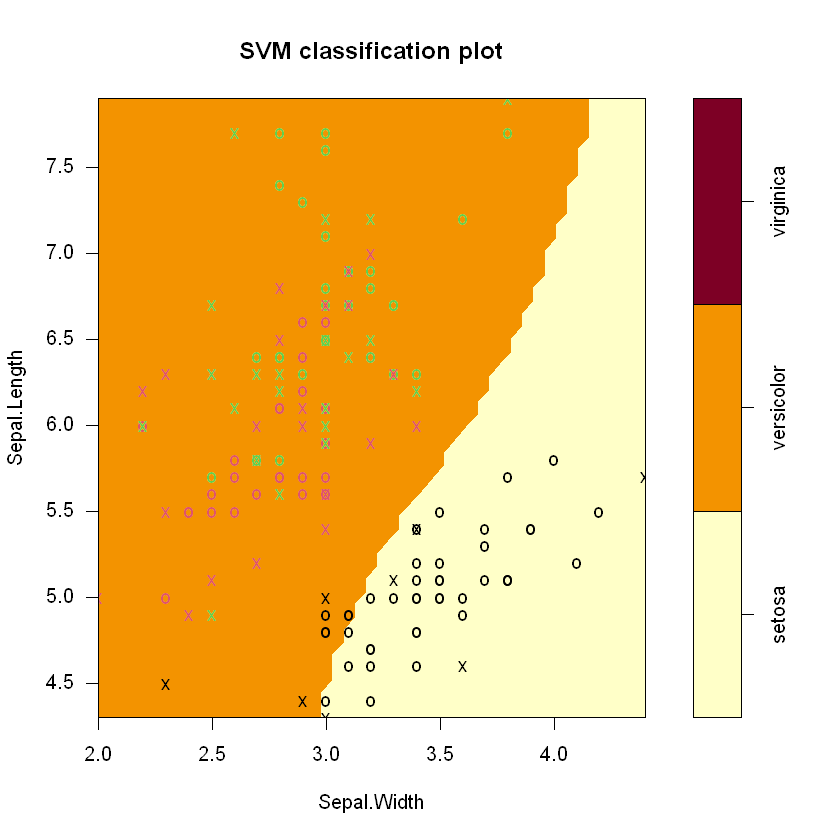

In [28]:
# 필요한 패키지 설치 및 로드
install.packages("e1071")
library(e1071)

# 데이터셋 로드
data(iris)

# 데이터 확인
head(iris)

# SVM 모델 생성 (radial basis function 커널 사용)
svm_model <- svm(Species ~ ., data = iris, kernel = "radial")

# 모델 요약
summary(svm_model)


# 예측 수행
predicted_class <- predict(svm_model, iris)

# 실제 값과 예측 값을 비교
confusion_matrix <- table(predicted_class, iris$Species)
print(confusion_matrix)

# 정확도 계산
accuracy <- mean(predicted_class == iris$Species)
print(paste("정확도:", accuracy))


# Sepal.Length와 Sepal.Width로 SVM 시각화
plot(svm_model, iris, Sepal.Length ~ Sepal.Width, slice = list(Petal.Length = 3, Petal.Width = 1))



### ROC

Warning message:
"package 'pROC' is in use and will not be installed"


Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         0      
2 4.9          3.0         1.4          0.2         0      
3 4.7          3.2         1.3          0.2         0      
4 4.6          3.1         1.5          0.2         0      
5 5.0          3.6         1.4          0.2         0      
6 5.4          3.9         1.7          0.4         0

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Species ~ Sepal.Length + Sepal.Width, family = binomial, 
    data = iris_binary)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)    -360.6   195972.9  -0.002    0.999
Sepal.Length    131.8    64577.0   0.002    0.998
Sepal.Width    -110.1    55361.5  -0.002    0.998

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.3863e+02  on 99  degrees of freedom
Residual deviance: 7.1185e-09  on 97  degrees of freedom
AIC: 6

Number of Fisher Scoring iterations: 25


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 1

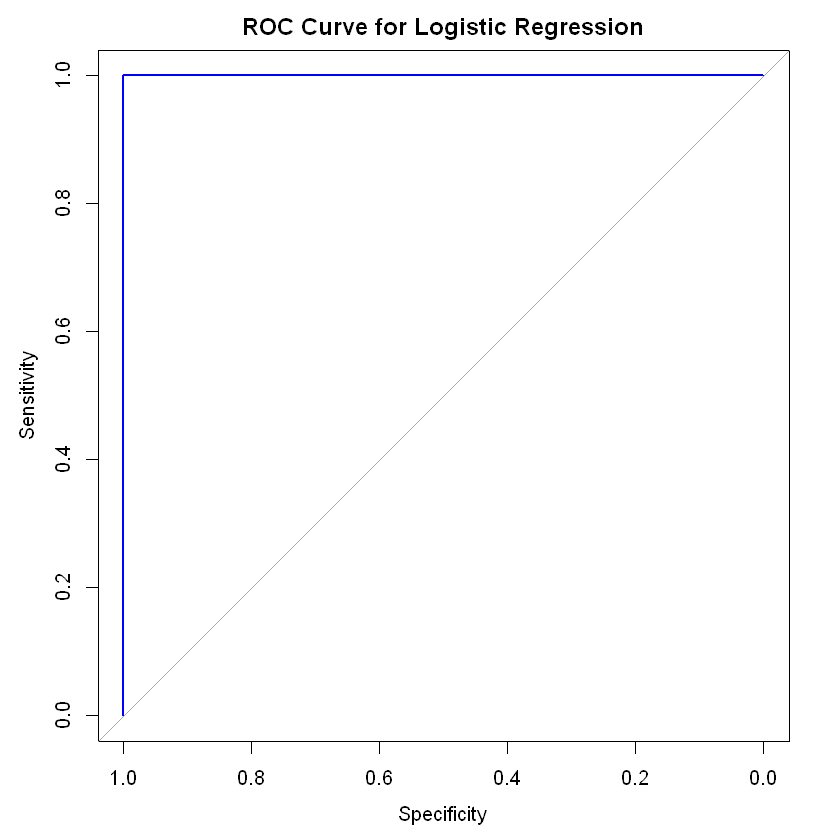

In [30]:
# 필요한 패키지 설치 및 로드
install.packages("pROC")
library(pROC)

# 데이터셋 로드
data(iris)

# 두 개의 클래스만 선택 (setosa와 versicolor)
iris_binary <- subset(iris, Species %in% c("setosa", "versicolor"))

# 클래스 레이블을 숫자로 변환
iris_binary$Species <- as.numeric(iris_binary$Species) - 1  # 0: setosa, 1: versicolor

# 데이터 확인
head(iris_binary)


# 로지스틱 회귀 모델 생성
logit_model <- glm(Species ~ Sepal.Length + Sepal.Width, data = iris_binary, family = binomial)

# 모델 요약
summary(logit_model)


# 예측 확률 계산
predicted_prob <- predict(logit_model, iris_binary, type = "response")

# ROC 커브 계산
roc_curve <- roc(iris_binary$Species, predicted_prob)

# AUC 출력
auc(roc_curve)

# ROC 커브 시각화
plot(roc_curve, col = "blue", main = "ROC Curve for Logistic Regression")



설명:
roc() 함수는 실제 클래스와 예측 확률을 사용하여 ROC 커브를 계산합니다.
plot() 함수는 ROC 커브를 시각화합니다.
auc() 함수는 ROC 커브 아래 면적인 AUC 값을 계산하여 모델의 성능을 평가할 수 있습니다.


예시 결과 해석
ROC 커브:
ROC 커브는 FPR(거짓 양성 비율)을 x축에, TPR(참 양성 비율)을 y축에 나타낸 곡선입니다. ROC 커브가 좌측 상단에 가까울수록 모델의 성능이 좋다는 것을 의미합니다.
AUC (Area Under the Curve):
ROC 커브 아래의 면적인 AUC 값이 0.5에서 1 사이의 값을 가지며, AUC가 1에 가까울수록 좋은 모델입니다.
AUC = 0.5이면 랜덤 예측과 동일한 성능을 의미합니다.

### 향상도곡선

In [35]:
# 필요한 패키지 설치 및 로드
install.packages("caret")
install.packages("ggplot")
library(caret)
library(ggplot2)

# 데이터셋 로드
data(iris)

# 두 개의 클래스만 선택 (setosa와 versicolor)
iris_binary <- subset(iris, Species %in% c("setosa", "versicolor"))

# 클래스 레이블을 숫자로 변환 (0: setosa, 1: versicolor)
iris_binary$Species <- as.numeric(iris_binary$Species) - 1

# 데이터 확인
head(iris_binary)


# 훈련 및 테스트 데이터 분할
set.seed(123)
train_index <- createDataPartition(iris_binary$Species, p = 0.7, list = FALSE)
train_data <- iris_binary[train_index, ]
test_data <- iris_binary[-train_index, ]

# 로지스틱 회귀 모델 학습
logit_model <- train(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width,
                     data = train_data, method = "glm", family = binomial)

# 모델 요약
summary(logit_model)


# 예측 확률 계산
predicted_prob <- predict(logit_model, test_data, type = "prob")[,2]  # versicolor의 확률

# 실제 값과 예측 확률 결합
test_data$predicted_prob <- predicted_prob

# 데이터 정렬 (높은 확률 순으로)
test_data <- test_data[order(-test_data$predicted_prob), ]

# 누적 TPR 계산
test_data$cum_positive <- cumsum(test_data$Species) / sum(test_data$Species)
test_data$cum_random <- seq_along(test_data$Species) / nrow(test_data)

# 향상도 곡선 그리기
ggplot(test_data, aes(x = cum_random, y = cum_positive)) +
  geom_line(color = "blue", size = 1) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(title = "향상도 곡선 (Gain Chart)", x = "상위 %", y = "누적 Positive 비율") +
  theme_minimal()


Warning message:
"package 'caret' is in use and will not be installed"
Installing package into 'C:/Users/medici/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

Warning message:
"package 'ggplot' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         0      
2 4.9          3.0         1.4          0.2         0      
3 4.7          3.2         1.3          0.2         0      
4 4.6          3.1         1.5          0.2         0      
5 5.0          3.6         1.4          0.2         0      
6 5.4          3.9         1.7          0.4         0

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numericall


Call:
NULL

Coefficients:
               Estimate Std. Error z value Pr(>|z|)
(Intercept)     -17.148 447008.969       0        1
Sepal.Length     -3.019 120077.768       0        1
Sepal.Width      -9.685 103706.664       0        1
Petal.Length     20.513 122969.771       0        1
Petal.Width      10.623 331445.298       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 9.7041e+01  on 69  degrees of freedom
Residual deviance: 8.1566e-10  on 65  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


ERROR: Error in dimnames(out)[[2]] <- modelFit$obsLevels: length of 'dimnames' [2] not equal to array extent
